# Plotting with pandas .plot()

In [ ]:
#Import packages 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 

In [ ]:
#Create data in a pandas series  
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts


2000-01-01    0.689309
2000-01-02    1.696102
2000-01-03    0.423701
2000-01-04   -0.492526
2000-01-05   -0.545071
                ...   
2002-09-22   -0.315143
2002-09-23   -0.792462
2002-09-24    0.253696
2002-09-25   -1.110905
2002-09-26   -0.766638
Freq: D, Length: 1000, dtype: float64

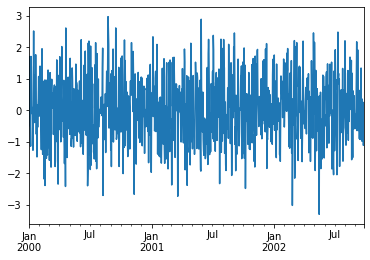

In [ ]:
#By default, .plot() will return a line plot 
ts.plot()

This data is fairly messy, let's use pandas's cumulative sum method to make this more useful. 

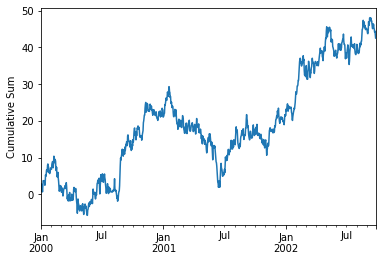

In [ ]:
ts2= ts.cumsum()
ts2.plot(ylabel="Cumulative Sum")#See that the data is verticle and the dates are the horizontal 

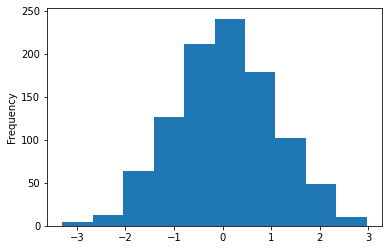

In [ ]:
#We can specify the type of graph we want using the kind argument. 
#The slides and pandas have a number of arguments you can reference. 
#Plot a standard histogram 
ts.plot(kind='hist', xlabel="value")

In [ ]:
#By default pandas will graph all columns in the given DataFrame 
#Create a new DataFrame with 4 sereis of numbers for each date 
df = pd.DataFrame(np.random.randn(1000,4), index=ts.index, columns=list("ABCD"))
df

,A,B,C,D
2000-01-01,-0.162751,2.151968,-2.219951,-1.126628
2000-01-02,0.656352,0.070323,-0.661500,1.970676
2000-01-03,0.679859,0.604794,0.219479,-1.519017
2000-01-04,-1.032235,0.932425,-1.070431,0.253972
2000-01-05,-0.394234,-0.585939,-0.974322,-0.950234
...,...,...,...,...
2002-09-22,-0.624064,-0.066074,-0.407473,-1.696719
2002-09-23,-1.049381,-0.340098,1.286401,0.452784
2002-09-24,-0.669098,1.660753,0.212556,-1.093981
2002-09-25,1.280810,-1.430975,0.541857,-0.335463


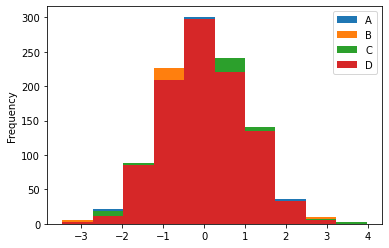

In [ ]:
#Plot the standard histogram 
df.plot(kind='hist')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f14570212b0>,
      dtype=object)

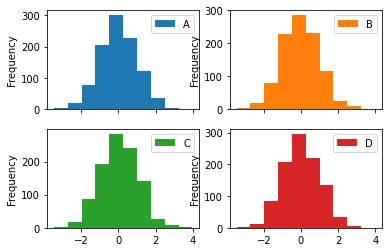

In [ ]:
#This is again pretty messy, lets split up the plot into subplots 
df.plot(kind='hist', subplots=True, layout=(2,2))

# Seaborn Examples 

In [ ]:
import seaborn as sns 

In [ ]:
planets = sns.load_dataset('planets')

In [ ]:
type(planets)

pandas.core.frame.DataFrame

The first thing we should do when we bring in a new dataset is explore the data. What are some things we can do to explore this data?

In [ ]:
#.describe()
planets.describe()

,number,orbital_period,mass,distance,year
count,1035.000000,992.000000,513.000000,808.000000,1035.000000
mean,1.785507,2002.917596,2.638161,264.069282,2009.070531
std,1.240976,26014.728304,3.818617,733.116493,3.972567
min,1.000000,0.090706,0.003600,1.350000,1989.000000
25%,1.000000,5.442540,0.229000,32.560000,2007.000000
50%,1.000000,39.979500,1.260000,55.250000,2010.000000
75%,2.000000,526.005000,3.040000,178.500000,2012.000000
max,7.000000,730000.000000,25.000000,8500.000000,2014.000000


In [ ]:
#.info()
planets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1035 entries, 0 to 1034
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   method          1035 non-null   object 
 1   number          1035 non-null   int64  
 2   orbital_period  992 non-null    float64
 3   mass            513 non-null    float64
 4   distance        808 non-null    float64
 5   year            1035 non-null   int64  
dtypes: float64(3), int64(2), object(1)
memory usage: 48.6+ KB


In [ ]:
planets.head()

,method,number,orbital_period,mass,distance,year
0,Radial Velocity,1,269.300,7.10,77.40,2006
1,Radial Velocity,1,874.774,2.21,56.95,2008
2,Radial Velocity,1,763.000,2.60,19.84,2011
3,Radial Velocity,1,326.030,19.40,110.62,2007
4,Radial Velocity,1,516.220,10.50,119.47,2009


In [ ]:
planets.shape

(1035, 6)

We will plot a special type scatterplot called a strip plot. This will treat our feature as a catergorical feature. 

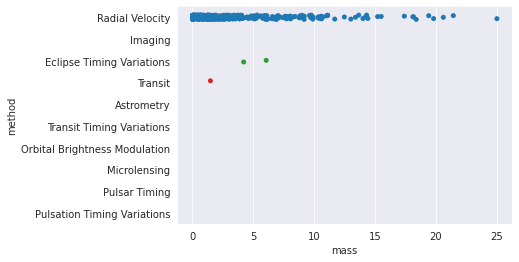

In [ ]:
#Set style 
sns.set_style("darkgrid")
#Create our plot 
sns.stripplot(x="mass", y="method", data=planets)

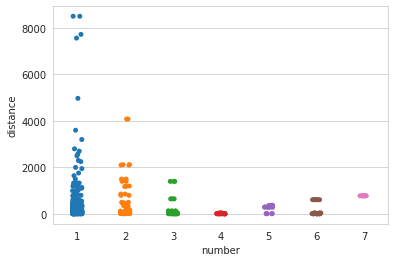

In [ ]:
sns.set_style("whitegrid")
sns.stripplot(x="number", y="distance", data=planets)

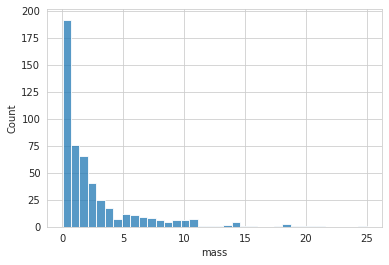

In [ ]:
#Let's create a histogram 
sns.histplot(data=planets, x="mass")

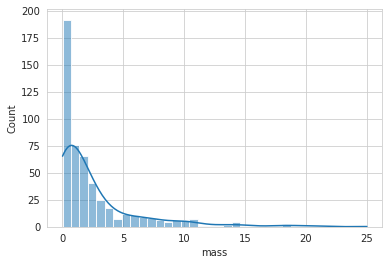

In [ ]:
#If we want we can reverse the axis of our plot simply by changing x to y
#We can remove the parts by setting the element argument (ex: element="poly")
#We can also unfill the bars using fill=False 
#We can the kernel density estimate to our histogram using kde
sns.histplot(data=planets, x="mass", kde=True)


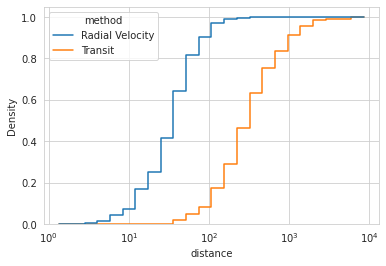

In [ ]:
#Seaborn histograms work well for compairisons 
sns.histplot(data=planets, x="distance", hue="method", hue_order=["Radial Velocity", "Transit"],
             log_scale=True, element="step", fill=False, cumulative=True, stat="density",
             common_norm=False)

In [ ]:
flights = sns.load_dataset('flights')

In [ ]:
#Let's check the content 
flights.tail()

,year,month,passengers
139,1960,Aug,606
140,1960,Sep,508
141,1960,Oct,461
142,1960,Nov,390
143,1960,Dec,432


In [ ]:
#We will make a wide dataset using .pivot. This will make it easier to view the number of passengers for each month
flights_wide= flights.pivot(index="year", columns="month", values="passengers")
flights_wide.head()

month,Jan,Feb,Mar,Apr,May,Jun,Jul,Aug,Sep,Oct,Nov,Dec
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201


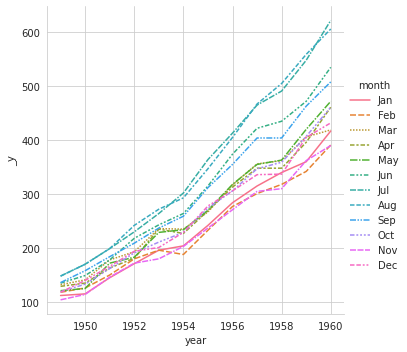

In [ ]:
sns.relplot(data=flights_wide, kind="line")